# 📺 Netflix Data Analysis

Welcome to an exploratory dive into Netflix content trends! We'll analyze the Netflix dataset to understand content distribution, genre popularity, country-wise trends, and more.

Let's begin our binge-worthy analysis! 🍿📊


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid")



## 🗂️ Load the Dataset

We'll load the Netflix dataset which contains TV shows and movies available on Netflix up until 2021. It includes titles, release years, cast, genre, country, duration, and more.


In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 🔍 Dataset Overview

Let's take a look at the structure, summary, and missing values in our dataset to understand what we're working with.


In [5]:
# Basic info
print(df.info())

# Checking for nulls
print(df.isnull().sum())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description     

## 🧼 Data Cleaning

We'll clean up columns like `date_added`, fill in missing countries, and simplify genres to make the data more usable.


In [7]:
# 📅 Step: Clean and Convert 'date_added' column to datetime format

# Strip any leading/trailing whitespaces from date entries
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime, gracefully handling errors by coercing them into NaT (Not a Time)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 🗓️ Extract the year from 'date_added' for year-wise analysis
df['year_added'] = df['date_added'].dt.year

# 🕵️ Optional: Display rows where date conversion failed (if any)
invalid_dates = df[df['date_added'].isna()]
print(f"\n⚠️ Invalid or missing dates: {len(invalid_dates)} entries")



⚠️ Invalid or missing dates: 10 entries


## 🎬 Content Type: Movies vs TV Shows

Let's explore the distribution between Movies and TV Shows on Netflix.


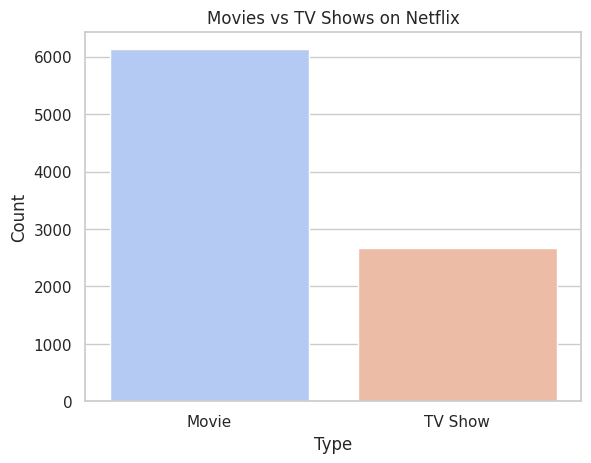

In [8]:
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## 🌍 Top Countries Contributing to Netflix Content

We'll check which countries have the most titles featured on Netflix.


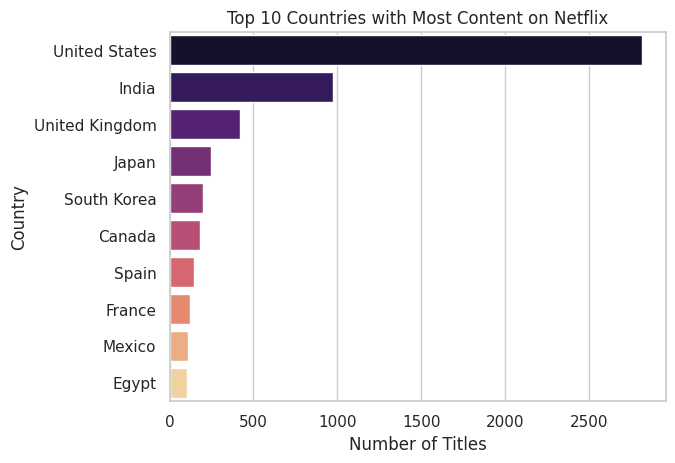

In [9]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


## 🎭 Most Popular Genres on Netflix

Let's find out which genres are most frequently listed.


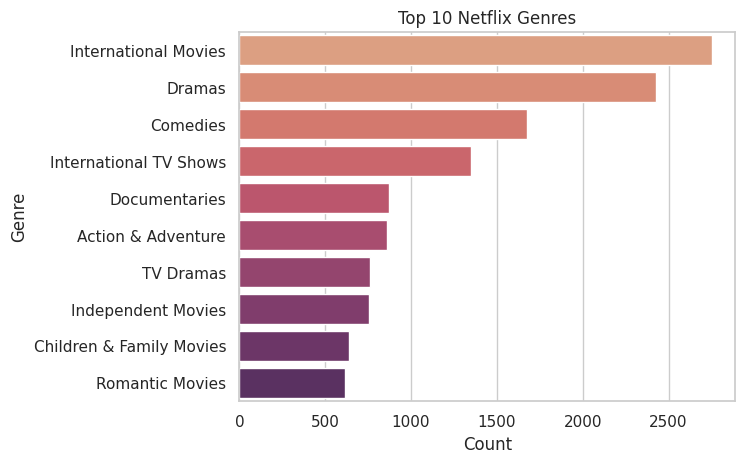

In [10]:
from collections import Counter

genres = ','.join(df['listed_in'].dropna()).split(',')
genre_freq = pd.DataFrame(Counter([g.strip() for g in genres]).most_common(10), columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=genre_freq, palette='flare')
plt.title('Top 10 Netflix Genres')
plt.show()


## 📅 Netflix Content Over the Years

Analyzing how content additions to Netflix have changed over time.


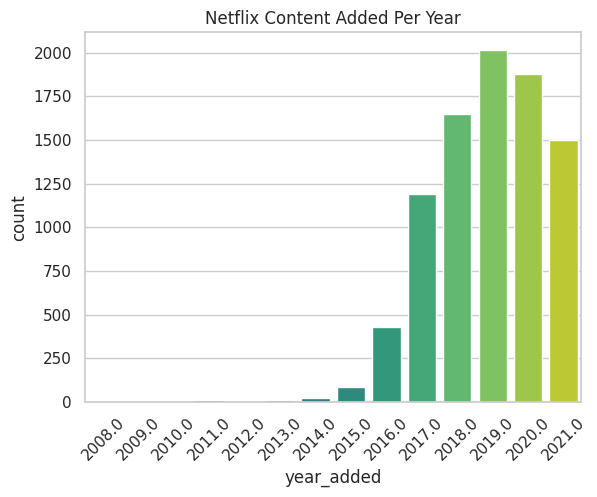

In [11]:
sns.countplot(data=df, x='year_added', palette='viridis', order=sorted(df['year_added'].dropna().unique()))
plt.title('Netflix Content Added Per Year')
plt.xticks(rotation=45)
plt.show()


## 🎬 Frequent Directors

Who are the most recurring directors on Netflix?


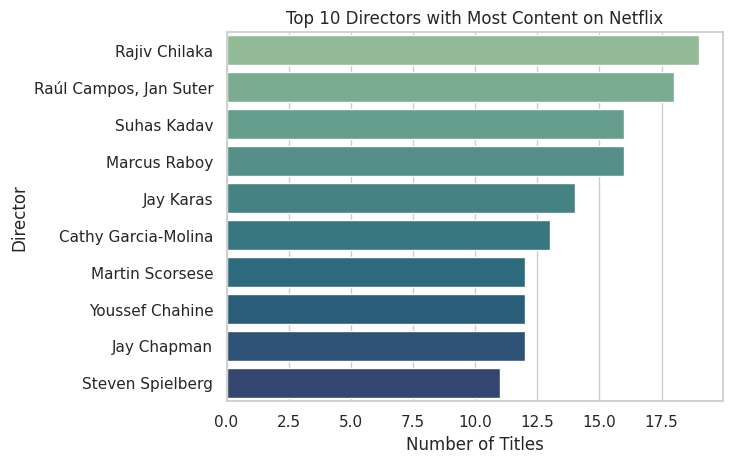

In [13]:
# Filter out rows where 'director' is NaN before counting
top_directors = df['director'].dropna().value_counts().head(10)

sns.barplot(y=top_directors.index, x=top_directors.values, palette='crest')
plt.title('Top 10 Directors with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

## ✅ Conclusion

We've explored Netflix's treasure trove of movies and shows by type, genre, country, and time. From visualization to insight, this analysis highlights how Netflix has evolved as a global content powerhouse.

---

## 💡 Future Ideas

- Build a recommendation engine based on genres and cast
- Use NLP to analyze description sentiment
- Compare Netflix vs other OTT platforms

---

## ✍️ Created by Sandhiya G

Final Year AI&DS Student  
Aspiring Data Scientist | Visual Storyteller  
[GitHub](https://github.com/sandhiyagovind) | [LinkedIn](https://www.linkedin.com/in/sandhiya-govind-4043382b8/)
